In [31]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

## Loading Data

In [34]:
(X_tn, y_train),(X_tt, y_test) = mnist.load_data()

In [36]:
X_tn.shape

(60000, 28, 28)

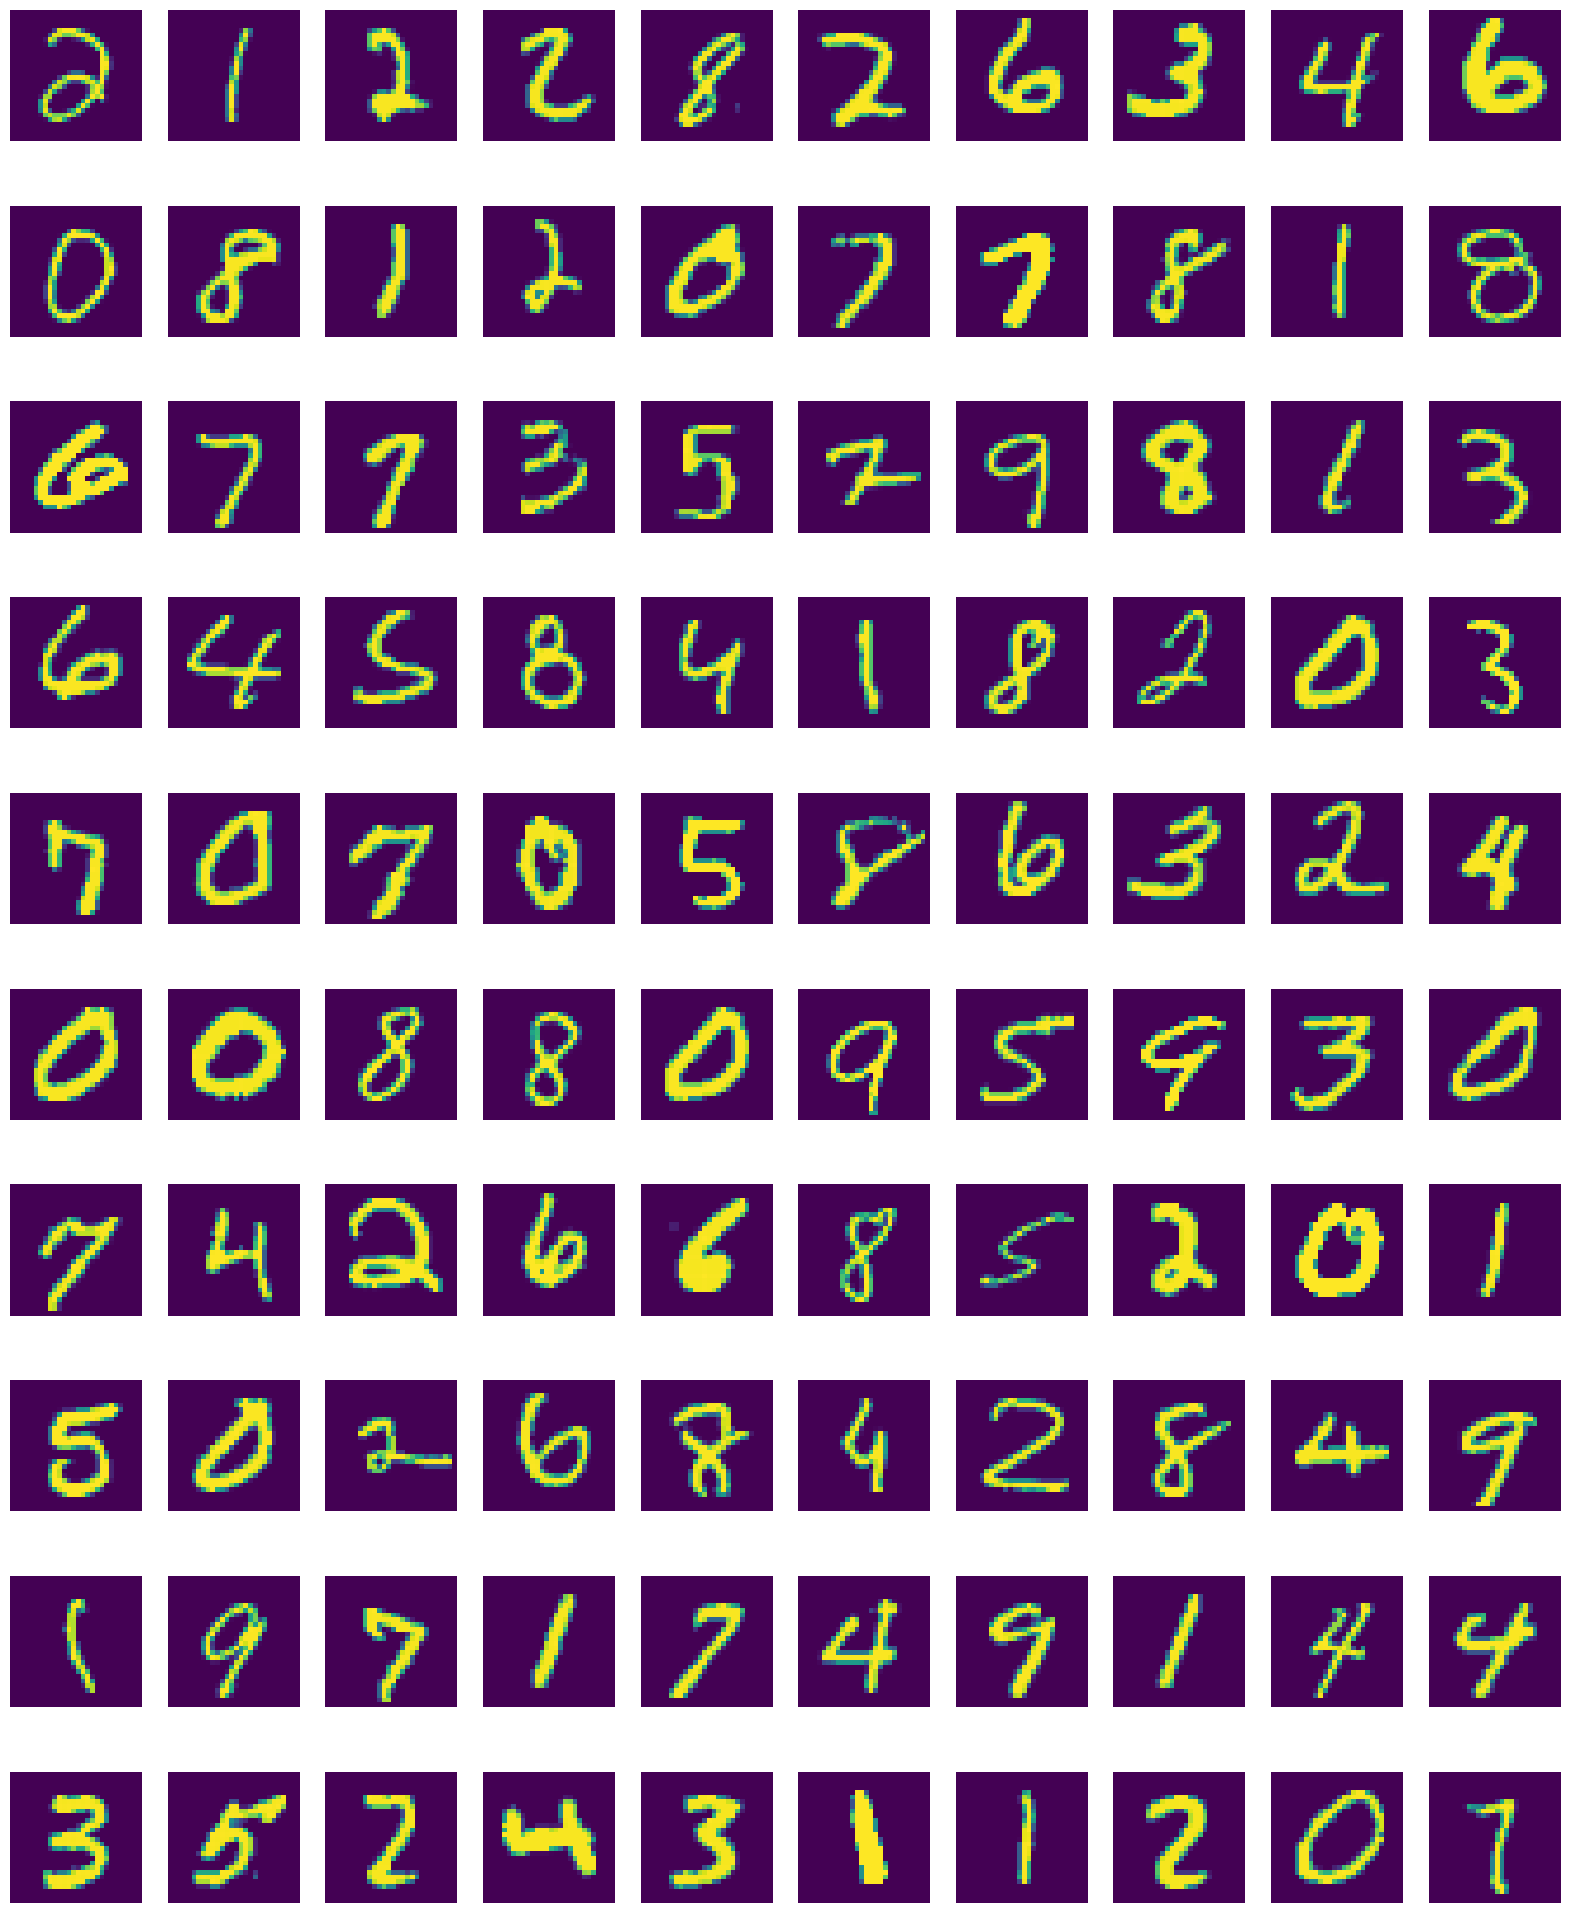

In [75]:
plt.figure(figsize=(20,25))
for i in range(100):
    ax = plt.subplot(10,10,i+1)
    plt.imshow(X_tn[random.randrange(60000)])
    plt.axis('off')
plt.savefig('Images/digit_grid.png', bbox_inches='tight', pad_inches=0)
plt.show()

## One Hot Encoding the Labels

In [41]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test, 10)

## Normalling the Images

In [44]:
X_train = X_tn.astype('float32')/255
X_test = X_tt.astype('float32')/255

## Reshaping Images

In [47]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

## Building Model

In [50]:
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Training Model

In [53]:
History = model.fit(X_train, y_train,epochs=10, batch_size=128)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8697 - loss: 0.4518
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9801 - loss: 0.0623
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9885 - loss: 0.0380
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9913 - loss: 0.0288
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9930 - loss: 0.0221
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9953 - loss: 0.0157
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9959 - loss: 0.0138
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9965 - loss: 0.0105
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9973 - loss: 0.0093
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9972 - loss: 0.0089


## Accuracy and Loss

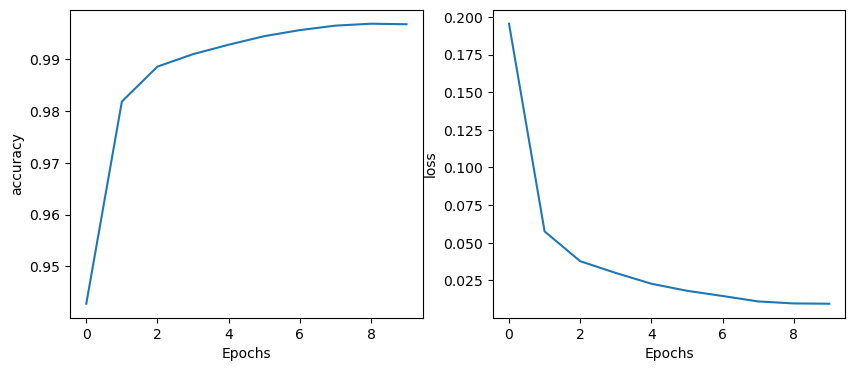

In [66]:
plt.figure(figsize=(10,4))
for idx, x in enumerate(list(History.history.keys())):
    ax = plt.subplot(1,2,idx+1)
    plt.plot(History.epoch, History.history[x], label=x)
    plt.xlabel('Epochs')
    plt.ylabel(x)
    # plt.axis('off')
plt.savefig('Images/CNN_Accuracy_Loss.png', bbox_inches='tight', pad_inches=0)
plt.show()

In [57]:
Pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


In [59]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy : {accuracy*100:0.2f}\nLoss : {loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9876 - loss: 0.0389
Accuracy : 99.05
Loss : 0.030718164518475533


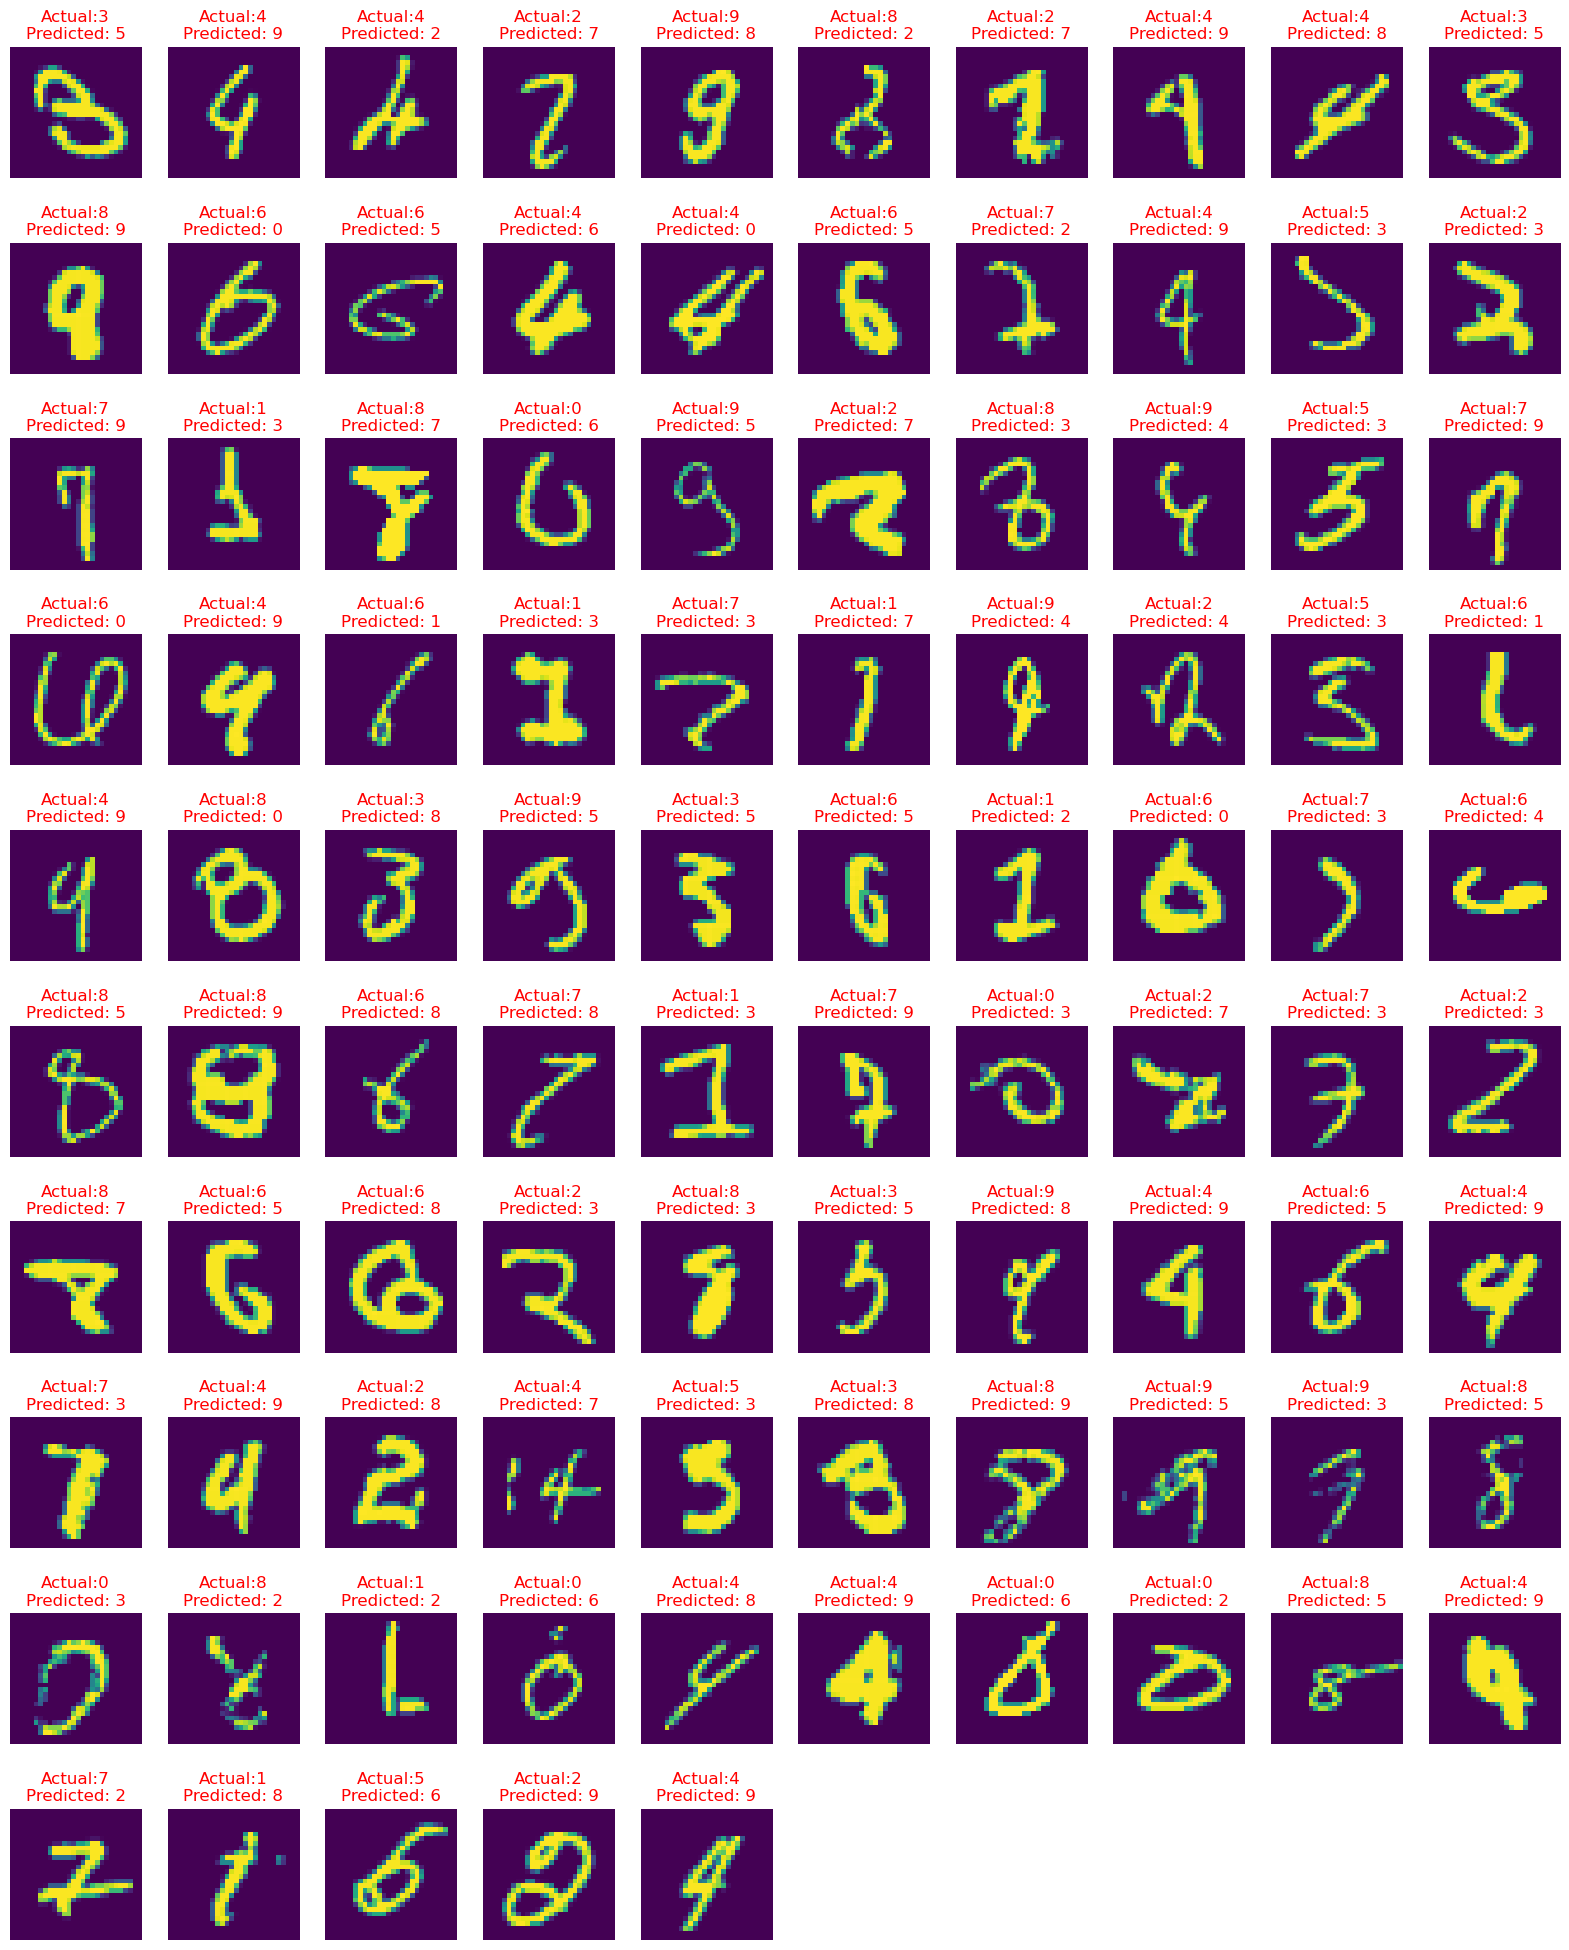

In [81]:
plt.figure(figsize=(20,25))
i=0
for j in range(10000):
    if(np.argmax(y_test[j])==np.argmax(Pred[j])):
        continue
    ax = plt.subplot(10,10,i+1)
    # j = random.randrange(6000)
    plt.title(f"Actual:{np.argmax(y_test[j])}\nPredicted: {np.argmax(Pred[j])}",color='red')
    plt.imshow(X_tt[j])
    plt.axis('off')
    i=i+1
    if i == 100:
        break
plt.savefig('Images/CNN_Incorrect_Prediction.png', bbox_inches='tight', pad_inches=0)
plt.show()

## Plotting Weights

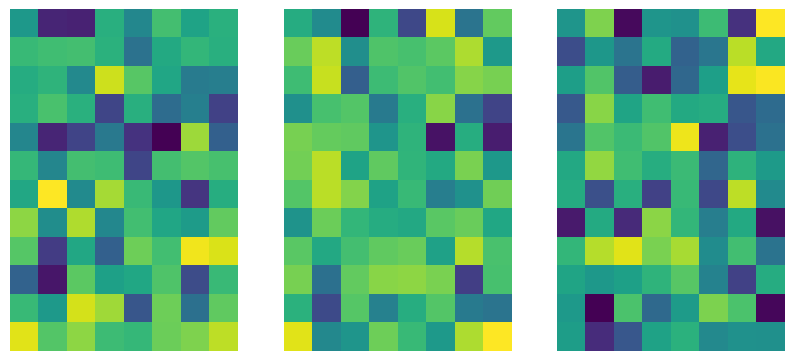

In [229]:
first_layer_weights = model.layers[0].get_weights()[0]

plt.figure(figsize=(10, 10))
for i in range(3):
    plt.subplot(1, 3, i+1)
    weight_image = first_layer_weights[:, i].reshape(12, 8)
    plt.imshow(weight_image)
    plt.axis('off')
plt.show()

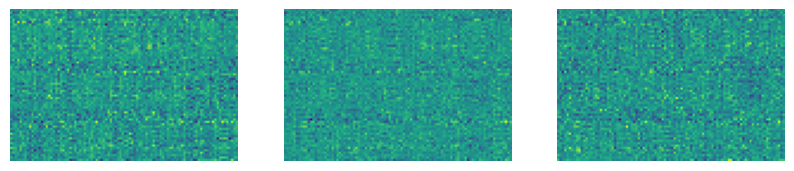

In [241]:
layer_weights = model.layers[2].get_weights()[0]

plt.figure(figsize=(10, 10))
for i in range(3):
    plt.subplot(1, 3, i+1)
    weight_image = layer_weights[:, i].reshape(64, 96)
    plt.imshow(weight_image)
    plt.axis('off')
plt.show()

## Save Model

In [244]:
model.save('MNIST_DIGITS_CNN_MODEL.keras')